# Spikes distribution based on different threshold 

In [3]:
from typing import Tuple

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats

from dataloader import UniformSegmentDataset
# from utils.util import segment_with_threshold
from param import *


In [35]:
K_options = [10, 16, 30, 60, 100, 200, 300]
segemeng_spikes_all = []
for K in K_options: 
    segemeng_spikes = []
    for i, data_dir in enumerate(ParamDir().data_list):
        data_name = str(data_dir).split('/')[-1]
        mouse_type = "KO" if "KO" in data_name else "WT"
        dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
        _ = dataset.load_all_data(ParamData().window_size, K, ParamData().train_ratio)
        segemeng_spikes.extend(dataset.X_test_seg.sum(axis=2).sum(axis=1))
    segemeng_spikes_all.append(segemeng_spikes)
    


In [36]:
[len(i) for i in segemeng_spikes_all]

[1182, 781, 474, 317, 264, 226, 217]

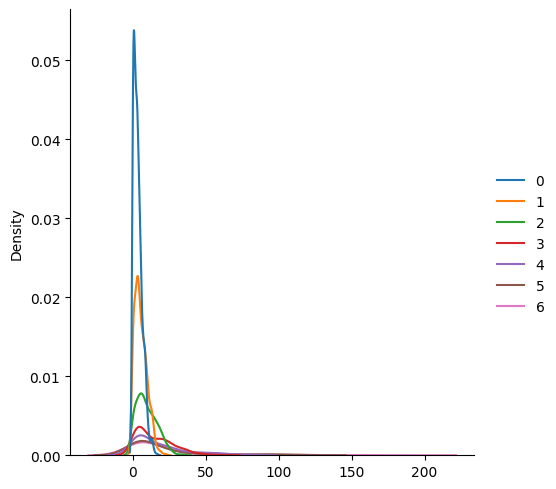

In [37]:
sns.displot(segemeng_spikes_all, kind="kde")

In [10]:
dataset.X_test_seg.sum(axis=2).sum(axis=1)

(66,)